### Lab Experiment 1.1
**Objective:** Understanding neural network layers (input, hidden, output) through a binary image classification task:
**Focus Problem:** Detect whether an image contains a cat or not.
<hr>

## General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a very simple Neural Network!**

<img src="image/LogReg_kiank.png" style="width:650px;height:400px;">


#### 🧑‍🎓 Student Details

| Field                | Information                |
|---------------------|----------------------------|
| 👨‍🎓 **Name**            | _[Enter Your Full Name]_     |
| 🆔 **USN**              | _[Enter Your USN]_           |
| **Section**        | _[Enter Your Section]_ |
| **Programme**   | B.Tech(H)             |
| **School**  | Computer Science and Engineering |


### Lab Setup

In [1]:
# Load the important Libraries 
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.model_selection import train_test_split

##### Complete the code ####

#### Load the cat dataset 

In [3]:
train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:])
train_set_y_orig = np.array(train_dataset["train_set_y"][:])
    
test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:])
test_set_y_orig = np.array(test_dataset["test_set_y"][:])
    
classes = np.array(test_dataset["list_classes"][:])
    
train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
print("✓ Loaded real cat images from H5 files")

##### Complete the code ####
# Display info
m_train = train_set_x_orig.shape[0]
m_test = train_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
############################

print("\n Dataset Information:")
print(f"  Training images: {m_train}")
print(f"  Test images: {m_test}")
print(f"  Image size: {num_px} × {num_px} pixels")
print(f"  Color channels: 3 (RGB)")
print(f"  Each image has: {num_px} × {num_px} × 3 = {num_px*num_px*3} pixels")

✓ Loaded real cat images from H5 files

 Dataset Information:
  Training images: 209
  Test images: 209
  Image size: 64 × 64 pixels
  Color channels: 3 (RGB)
  Each image has: 64 × 64 × 3 = 12288 pixels


#### Visualize the sample images

#### Now Preparing Data for Neural Networks

#### Understanding shape of the image 

In [5]:
# Pick one image to examine
##### Complete the code ####
sample_image = plt.imread("images/my_image.jpg")
############################
print(f"\nOriginal image shape: {sample_image.shape}")
print(f"  - Height: {sample_image.shape[0]} pixels")
print(f"  - Width: {sample_image.shape[1]} pixels")
print(f"  - Channels: {sample_image.shape[2]} (Red, Green, Blue)")

print(f"\n📦 This image is a 3D array!")
print(f"   But neural networks need 1D input (a flat list of numbers)")
print(f"   Solution: FLATTEN the image")



Original image shape: (681, 1024, 3)
  - Height: 681 pixels
  - Width: 1024 pixels
  - Channels: 3 (Red, Green, Blue)

📦 This image is a 3D array!
   But neural networks need 1D input (a flat list of numbers)
   Solution: FLATTEN the image



🔧 Before Flattening:
   Shape: (209, 64, 64, 3)
   This means: 209 images, each 64×64×3

🔧 After Flattening:
   Training shape: (12288, 209)
   This means: 12288 features × 209 images

💡 Each image is now a COLUMN of 12,288 numbers
   (64 × 64 × 3 = 12288)


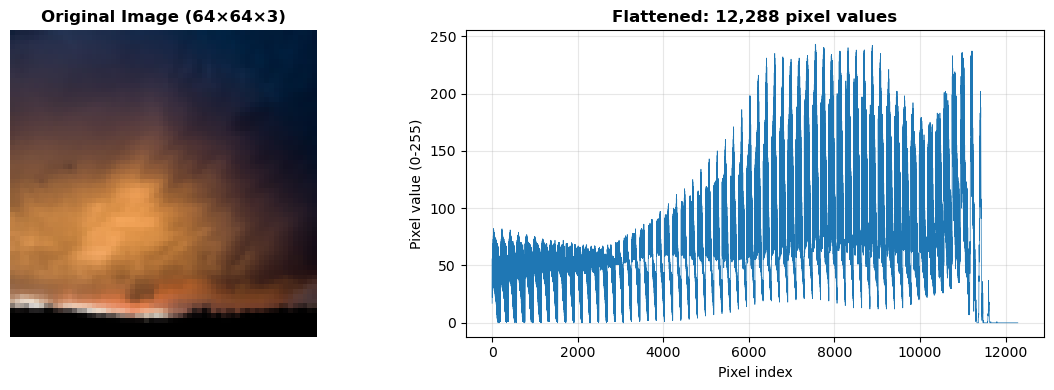

In [7]:
# Flatten the image 
# Show what flattening does
print("\n🔧 Before Flattening:")
print(f"   Shape: {train_set_x_orig.shape}")
print(f"   This means: {m_train} images, each 64×64×3")

##### Complete the code ####
# Flatten the images
# Flatten the images
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
############################

print("\n🔧 After Flattening:")
print(f"   Training shape: {train_set_x_flatten.shape}")
print(f"   This means: {train_set_x_flatten.shape[0]} features × {train_set_x_flatten.shape[1]} images")

print("\n💡 Each image is now a COLUMN of 12,288 numbers")
print(f"   (64 × 64 × 3 = {num_px * num_px * 3})")

# Visualize flattening
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Original image
axes[0].imshow(train_set_x_orig[0])
axes[0].set_title('Original Image (64×64×3)', fontweight='bold')
axes[0].axis('off')

# Flattened representation
axes[1].plot(train_set_x_flatten[:, 0], linewidth=0.5)
axes[1].set_title('Flattened: 12,288 pixel values', fontweight='bold')
axes[1].set_xlabel('Pixel index')
axes[1].set_ylabel('Pixel value (0-255)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
# Normalize the pixel values 
print("\n🔧 Before Normalization:")
print(f"   Pixel values range: 0 to 255")
print(f"   Sample pixels: {train_set_x_flatten[:5, 0]}")

##### Complete the code ####
# Normalize: divide by 255
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.
############################

print("\n🔧 After Normalization:")
print(f"   Pixel values range: 0.0 to 1.0")
print(f"   Sample pixels: {train_set_x[:5, 0]}")

print("\n💡 WHY NORMALIZE?")
print("   - Neural networks work better with small numbers")
print("   - All features (pixels) now on same scale")
print("   - Training converges faster")

# For Keras: transpose to (samples, features) format
X_train = train_set_x.T  # (209, 12288)
y_train = train_set_y.T  # (209, 1)
X_test = test_set_x.T    # (50, 12288)
y_test = test_set_y.T    # (50, 1)

print(f"\n✓ Data ready for Keras!")
print(f"   X_train: {X_train.shape} (209 images, 12288 features each)")
print(f"   y_train: {y_train.shape} (209 labels: 0 or 1)")



🔧 Before Normalization:
   Pixel values range: 0 to 255
   Sample pixels: [17 31 56 22 33]

🔧 After Normalization:
   Pixel values range: 0.0 to 1.0
   Sample pixels: [0.06666667 0.12156863 0.21960784 0.08627451 0.12941176]

💡 WHY NORMALIZE?
   - Neural networks work better with small numbers
   - All features (pixels) now on same scale
   - Training converges faster

✓ Data ready for Keras!
   X_train: (209, 12288) (209 images, 12288 features each)
   y_train: (209, 1) (209 labels: 0 or 1)


## Building Your First Neural Network 

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# -------------------------------
# Model 1: Logistic Regression
# -------------------------------
print("\n📐 Network Architecture:")
print("   Input (12,288 pixels) → Output (1 neuron)")
print("   This is just LOGISTIC REGRESSION")

model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(12288,))
])

model.summary()

print("\n💡 UNDERSTANDING THIS MODEL:")
print("   - NO hidden layers")
print("   - Parameters = (12288 × 1) + 1 = 12,289")
print("   - Each pixel directly connected to output")
print("   - Can only learn LINEAR patterns")


# -------------------------------
# Model 2: Neural Network
# -------------------------------
print("\n📐 Network Architecture:")
print("   Input → 16 → 8 → 1")
print("   This is a BASIC NEURAL NETWORK")

model_simple = Sequential([
    Dense(128, activation='relu', input_shape=(12288,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


model_simple.summary()

print("\n💡 UNDERSTANDING THIS MODEL:")
print("   - Has hidden layers")
print("   - Learns NON-LINEAR patterns")
print("   - Higher accuracy than logistic regression")



📐 Network Architecture:
   Input (12,288 pixels) → Output (1 neuron)
   This is just LOGISTIC REGRESSION


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_61 (Dense)                     │ (None, 1)                   │          12,289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)


💡 UNDERSTANDING THIS MODEL:
   - NO hidden layers
   - Parameters = (12288 × 1) + 1 = 12,289
   - Each pixel directly connected to output
   - Can only learn LINEAR patterns

📐 Network Architecture:
   Input → 16 → 8 → 1
   This is a BASIC NEURAL NETWORK


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                     │ (None, 128)                 │       1,572,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,587,521 (6.06 MB)

 Trainable params: 1,587,521 (6.06 MB)

 Non-trainable params: 0 (0.00 B)


💡 UNDERSTANDING THIS MODEL:
   - Has hidden layers
   - Learns NON-LINEAR patterns
   - Higher accuracy than logistic regression


#### Train the sample model 


 RESULTS:
   Training Accuracy: 90.43%
   Test Accuracy: 78.00%


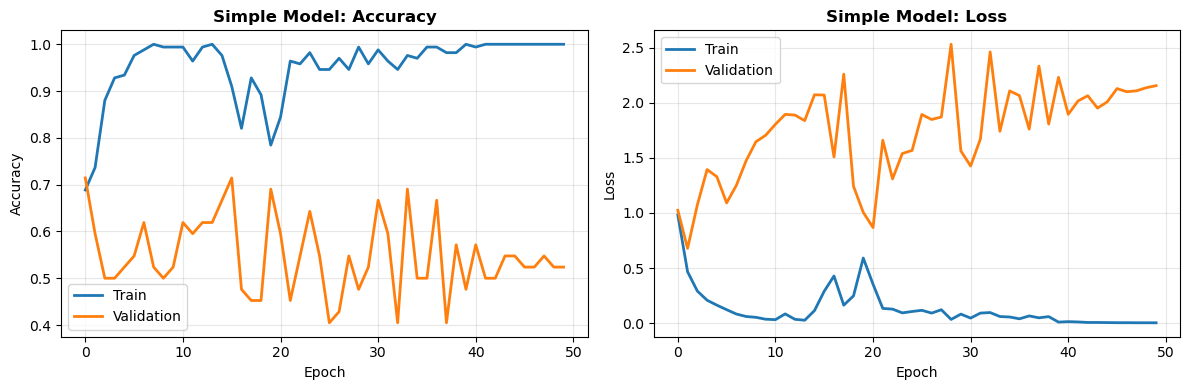

In [42]:
# Compile
model_simple.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
history_simple = model_simple.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

# Evaluate
train_loss, train_acc = model_simple.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model_simple.evaluate(X_test, y_test, verbose=0)

print(f"\n RESULTS:")
print(f"   Training Accuracy: {train_acc*100:.2f}%")
print(f"   Test Accuracy: {test_acc*100:.2f}%")

# Plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_simple.history['accuracy'], label='Train', linewidth=2)
plt.plot(history_simple.history['val_accuracy'], label='Validation', linewidth=2)
plt.title('Simple Model: Accuracy', fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history_simple.history['loss'], label='Train', linewidth=2)
plt.plot(history_simple.history['val_loss'], label='Validation', linewidth=2)
plt.title('Simple Model: Loss', fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Store for comparison
results = {
    'Model': ['No Hidden Layers'],
    'Architecture': ['12288 → 1'],
    'Parameters': [model_simple.count_params()],
    'Train Acc': [train_acc*100],
    'Test Acc': [test_acc*100]
}


#### Add one hidden Layer in the Network

In [43]:
print("\n Network Architecture:")
print("   Input (12,288) → Hidden (16 neurons) → Output (1)")


##### Complete the code ####
# Build model with 1 hidden layer
model_1hidden = Sequential([
    Dense(16, activation='relu', input_shape=(12288,)),  # Hidden layer
    Dense(1, activation='sigmoid')                       # Output layer
])
##### Complete the code ####

model_1hidden.summary()

print("\n💡 WHAT CHANGED:")
print("   ✓ Added 16 hidden neurons")
print("   ✓ Hidden layer uses ReLU (non-linear activation)")
print("   ✓ Can now learn NON-LINEAR patterns")
print(f"   ✓ Parameters increased: {model_1hidden.count_params():,}")

# Train
model_1hidden.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_1hidden = model_1hidden.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

# Evaluate
train_acc_1h = model_1hidden.evaluate(X_train, y_train, verbose=0)[1]
test_acc_1h = model_1hidden.evaluate(X_test, y_test, verbose=0)[1]

print(f"\n RESULTS:")
print(f"   Training Accuracy: {train_acc_1h*100:.2f}%")
print(f"   Test Accuracy: {test_acc_1h*100:.2f}%")
print(f"   Improvement over simple: +{(test_acc_1h - test_acc)*100:.2f}%")

# Store results
results['Model'].append('1 Hidden Layer')
results['Architecture'].append('12288 → 16 → 1')
results['Parameters'].append(model_1hidden.count_params())
results['Train Acc'].append(train_acc_1h*100)
results['Test Acc'].append(test_acc_1h*100)



 Network Architecture:
   Input (12,288) → Hidden (16 neurons) → Output (1)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_67 (Dense)                     │ (None, 16)                  │         196,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 196,641 (768.13 KB)

 Trainable params: 196,641 (768.13 KB)

 Non-trainable params: 0 (0.00 B)


💡 WHAT CHANGED:
   ✓ Added 16 hidden neurons
   ✓ Hidden layer uses ReLU (non-linear activation)
   ✓ Can now learn NON-LINEAR patterns
   ✓ Parameters increased: 196,641

 RESULTS:
   Training Accuracy: 65.55%
   Test Accuracy: 34.00%
   Improvement over simple: +-44.00%


#### Add one more Hidden Layer 

In [55]:
print("\n Network Architecture:")
print("   Input (12,288) → Dense(64) → Dense(32) → Dense(16) → Output(1)")


##### Complete the code ####
# Build deeper model
# Build deeper model
model_deep = Sequential([
    Dense(128, activation='relu', input_shape=(12288,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])



############################
model_deep.summary()

print("\n💡 DEEPER NETWORK:")
print("   ✓ 3 hidden layers with decreasing neurons (64→32→16)")
print("   ✓ Hierarchical feature learning")
print("   ✓ First layer: detects simple patterns")
print("   ✓ Deeper layers: combine patterns into concepts")

# Train
model_deep.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
##### Complete the code ####
history_deep = model_deep.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)




##### Complete the code ####

# Evaluate
train_acc_deep = model_deep.evaluate(X_train, y_train, verbose=0)[1]
test_acc_deep = model_deep.evaluate(X_test, y_test, verbose=0)[1]

print(f"\n RESULTS:")
print(f"   Training Accuracy: {train_acc_deep*100:.2f}%")
print(f"   Test Accuracy: {test_acc_deep*100:.2f}%")

# Store results
results['Model'].append('3 Hidden Layers')
results['Architecture'].append('12288 → 64 → 32 → 16 → 1')
results['Parameters'].append(model_deep.count_params())
results['Train Acc'].append(train_acc_deep*100)
results['Test Acc'].append(test_acc_deep*100)



 Network Architecture:
   Input (12,288) → Dense(64) → Dense(32) → Dense(16) → Output(1)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_81 (Dense)                     │ (None, 128)                 │       1,572,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,583,361 (6.04 MB)

 Trainable params: 1,583,361 (6.04 MB)

 Non-trainable params: 0 (0.00 B)


💡 DEEPER NETWORK:
   ✓ 3 hidden layers with decreasing neurons (64→32→16)
   ✓ Hierarchical feature learning
   ✓ First layer: detects simple patterns
   ✓ Deeper layers: combine patterns into concepts

 RESULTS:
   Training Accuracy: 77.99%
   Test Accuracy: 78.00%


#### Understanding the results and compare all the results 


LEARNING CURVES: HOW MODELS LEARNED


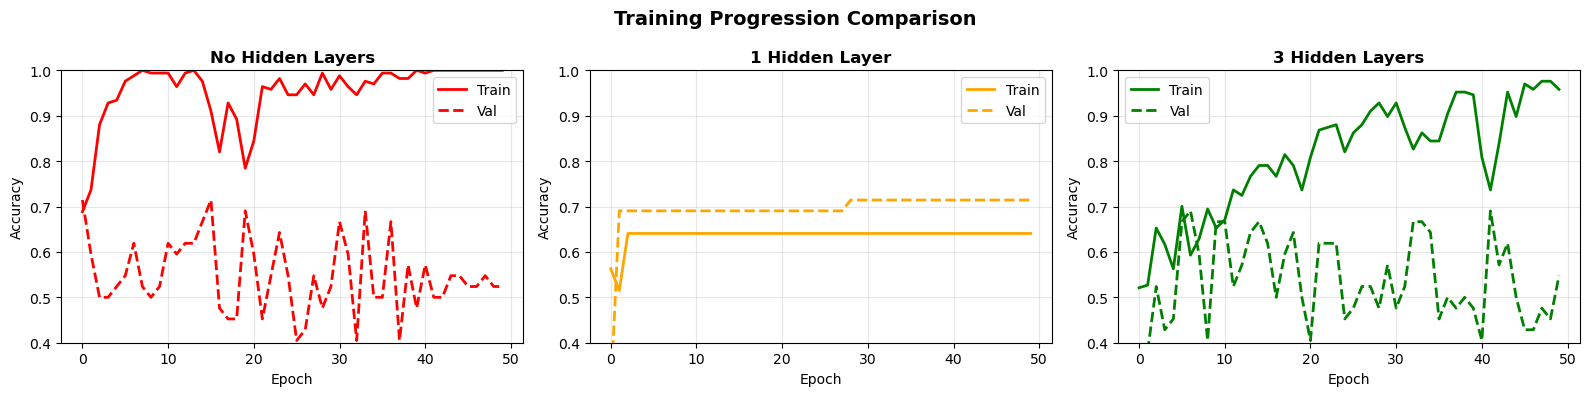


💡 INTERPRETATION:
   - Flat curves = underfitting (too simple)
   - Train >> Val = overfitting (too complex)
   - Close curves = good generalization


In [56]:
print("\n" + "="*70)
print("LEARNING CURVES: HOW MODELS LEARNED")
print("="*70)

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

histories = [
    (history_simple, 'No Hidden Layers', 'red'),
    (history_1hidden, '1 Hidden Layer', 'orange'),
    (history_deep, '3 Hidden Layers', 'green')
]

for i, (hist, title, color) in enumerate(histories):
    axes[i].plot(hist.history['accuracy'], label='Train', color=color, linewidth=2)
    axes[i].plot(hist.history['val_accuracy'], label='Val', 
                color=color, linewidth=2, linestyle='--')
    axes[i].set_title(title, fontweight='bold')
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Accuracy')
    axes[i].legend()
    axes[i].grid(alpha=0.3)
    axes[i].set_ylim([0.4, 1.0])

plt.suptitle('Training Progression Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 INTERPRETATION:")
print("   - Flat curves = underfitting (too simple)")
print("   - Train >> Val = overfitting (too complex)")
print("   - Close curves = good generalization")

#### Test the Model


TESTING THE MODEL: PREDICTIONS ON TEST SET


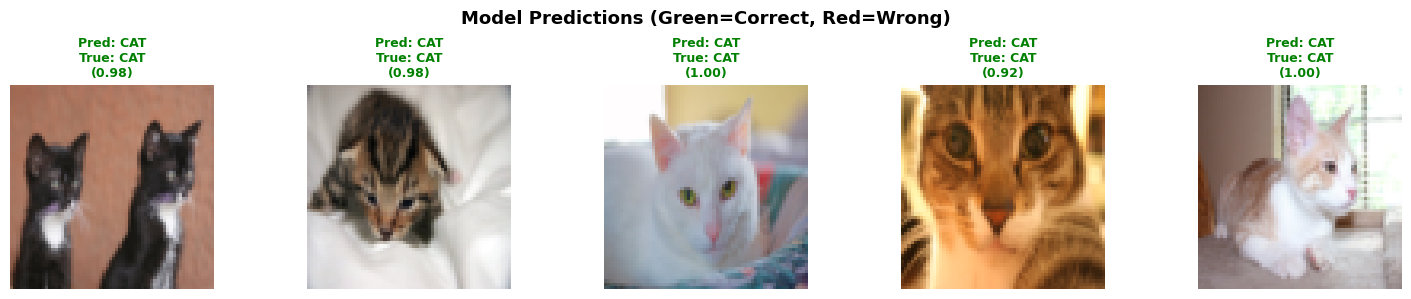


✓ Test Set: 39/50 correct (78.0%)


In [57]:
print("\n" + "="*70)
print("TESTING THE MODEL: PREDICTIONS ON TEST SET")
print("="*70)

# Get predictions on a few test images
num_samples = 5
predictions = model_deep.predict(X_test[:num_samples], verbose=0)

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(num_samples):
    # Reshape back to image
    img = test_set_x_orig[i]
    
    # Get prediction
    prob = predictions[i][0]
    pred_label = "CAT" if prob > 0.5 else "NON-CAT"
    true_label = "CAT" if y_test[i][0] == 1 else "NON-CAT"
    
    # Plot
    axes[i].imshow(img)
    color = 'green' if pred_label == true_label else 'red'
    axes[i].set_title(f'Pred: {pred_label}\nTrue: {true_label}\n({prob:.2f})', 
                     color=color, fontsize=9, fontweight='bold')
    axes[i].axis('off')

plt.suptitle('Model Predictions (Green=Correct, Red=Wrong)', 
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# Overall accuracy
y_pred = (model_deep.predict(X_test, verbose=0) > 0.5).astype(int)
correct = np.sum(y_pred.flatten() == y_test.flatten())
print(f"\n✓ Test Set: {correct}/{len(y_test)} correct ({correct/len(y_test)*100:.1f}%)")


Showing 3 CAT and 3 NON-CAT test images.



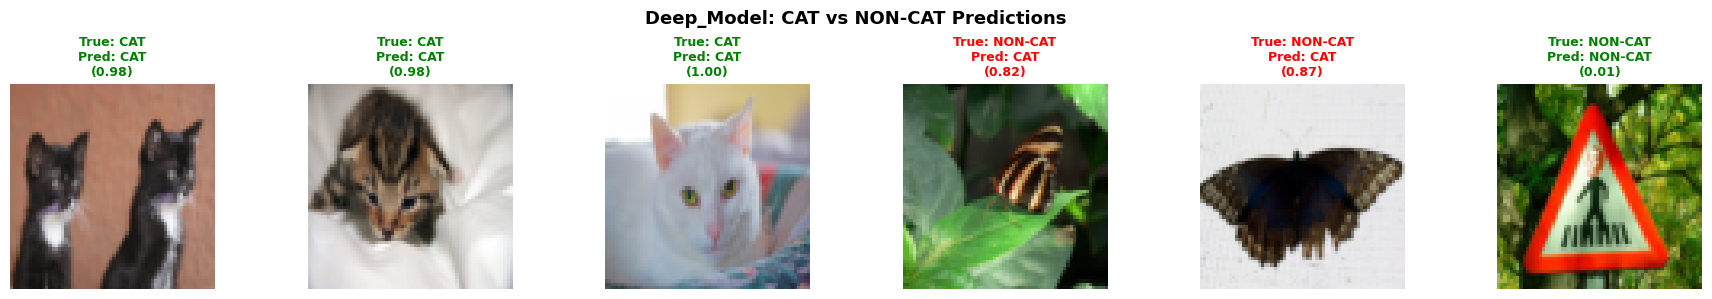

In [58]:
# How many examples of each to visualize
num_cats = 3
num_noncats = 3

# Indices of cat and non-cat images in test set
cat_indices = np.where(y_test.flatten() == 1)[0]
noncat_indices = np.where(y_test.flatten() == 0)[0]

# Safeguard in case there are fewer than requested
num_cats = min(num_cats, len(cat_indices))
num_noncats = min(num_noncats, len(noncat_indices))

selected_indices = list(cat_indices[:num_cats]) + list(noncat_indices[:num_noncats])

print(f"Showing {num_cats} CAT and {num_noncats} NON-CAT test images.\n")

fig, axes = plt.subplots(1, len(selected_indices), figsize=(3*len(selected_indices), 3))

if len(selected_indices) == 1:
    axes = [axes]  # handle case of single axis

# Get predictions for all selected indices at once
X_selected = X_test[selected_indices]
predictions = model_deep.predict(X_selected, verbose=0)

for ax, idx, pred in zip(axes, selected_indices, predictions):
    img = test_set_x_orig[idx]         # original image
    prob = float(pred[0])              # probability of class 1 (CAT)
    pred_label = "CAT" if prob > 0.5 else "NON-CAT"
    true_label = "CAT" if y_test[idx][0] == 1 else "NON-CAT"

    ax.imshow(img)
    color = 'green' if pred_label == true_label else 'red'
    ax.set_title(
        f'True: {true_label}\nPred: {pred_label}\n({prob:.2f})',
        color=color, fontsize=9, fontweight='bold'
    )
    ax.axis('off')

plt.suptitle('Deep_Model: CAT vs NON-CAT Predictions',
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()


##### Link for pandoc - Download the Software for export PDF for submission in GCR
https://github.com/jgm/pandoc/releases/tag/3.7.0.2

## Quick Self-Check

Tick only if you are confident:

- [ ] I understand why images are **flattened and normalized** before training.
- [ ] I can explain the difference between **no hidden layer**, **1 hidden layer**, and a **deep network**.
- [ ] I can compute parameters of a Dense layer.
- [ ] I can read train/validation curves
- [ ] I can build, train, and test a simple **cat vs non-cat** classifier in Keras on my own.

**Homework Task:**

## Problem Statement

Given an image dataset organized into two folders: **Cars** and **Bikes**.

### Task

#### A. Data Preprocessing 

1. Verify the folder structure and load all RGB images.
2. Preprocess the images by resizing them to a fixed size, normalizing pixel values, and converting them into one-dimensional feature vectors.
3. Assign class labels, shuffle the dataset, and split it into training and testing sets.

#### B. Implementation of Neural Network for the Above Classification Problem

4. Implement a neural network using gradient descent, train it for a fixed number of iterations while recording the cost, and evaluate the model by computing training and testing accuracy.
5. Plot the cost curve and report the final accuracy.


**Dataset Link:** https://drive.google.com/drive/folders/1UNuoCSjRLbcIEgrTahbvhHlxoy1JT-rR?usp=classroom_web&authuser=0


**Designed by**
*Ashwini Mathur, Assistant Professor, SOCSE*
